## Haberman Data:
The dataset contains cases from a study that was conducted between 1958 and 1970 at the University of Chicago's Billings Hospital on the survival of patients who had undergone surgery for breast cancer.
Source: https://www.kaggle.com/gilsousa/habermans-survival-data-set

## EDA

Attribute Information:
Age of patient at the time of operation (numerical)
Patient's year of operation (year - 1900, numerical)
Number of positive axillary nodes detected (numerical)
Survival status (class attribute) 1 = the patient survived 5 years or longer 2 = the patient died within 5 years

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style("whitegrid")

In [2]:
haberman=pd.read_csv(r"haberman.csv",names=["Age","Operation_Year","Axil_nodes","Survival_Status"])
haberman.head()

,Age,Operation_Year,Axil_nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


### Changing Survival Status from 1 or 2 to 'Yes' or 'No'

In [3]:
haberman.Survival_Status=haberman.Survival_Status.map({1:"Yes",2:"No"})

In [4]:
haberman.head()

,Age,Operation_Year,Axil_nodes,Survival_Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


In [5]:
#Q. How manydata data-points and features are there in the dataset
print (haberman.shape)

(306, 4)


In [6]:
#Q. What are the column names in 
print (haberman.columns)

Index(['Age', 'Operation_Year', 'Axil_nodes', 'Survival_Status'], dtype='object')


In [8]:
#Q. How many data points are there in each Survival Status?

haberman["Survival_Status"].value_counts()

Yes    225
No      81
Name: Survival_Status, dtype: int64

In [9]:
haberman.describe()

,Age,Operation_Year,Axil_nodes
count,306.000000,306.000000,306.000000
mean,52.457516,62.852941,4.026144
std,10.803452,3.249405,7.189654
min,30.000000,58.000000,0.000000
25%,44.000000,60.000000,0.000000
50%,52.000000,63.000000,1.000000
75%,60.750000,65.750000,4.000000
max,83.000000,69.000000,52.000000


Missing values in Data :
Age                0
Operation_Year     0
Axil_nodes         0
Survival_Status    0
dtype: int64


<AxesSubplot:>

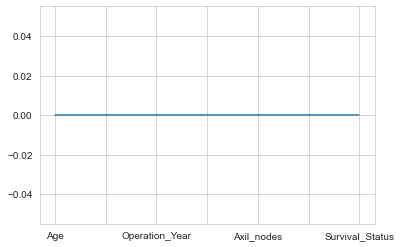

In [13]:
print("Missing values in Data :")
print(haberman.isnull().sum())
haberman.isnull().sum().plot()

No missing values in any column

No. of datapoints for each Survival_Status after 5 years class:
Yes - 225
No - 81


C:\Users\ankun\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survival_Status', ylabel='count'>

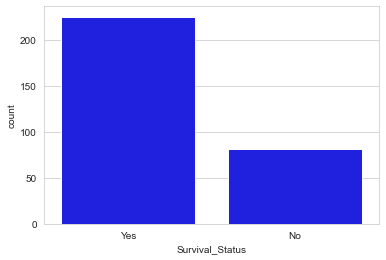

In [15]:
print("No. of datapoints for each Survival_Status after 5 years class:")
dict_Survival=haberman.Survival_Status.value_counts().to_dict()
for i in dict_Survival:
    print(i,"-",dict_Survival[i])

sns.countplot(haberman['Survival_Status'], color='blue')

It can be seen that Dataset is imbalanced between the two classes

#### Pairplot to visulaize feature relationships

C:\Users\ankun\anaconda3\lib\site-packages\seaborn\axisgrid.py:1912: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


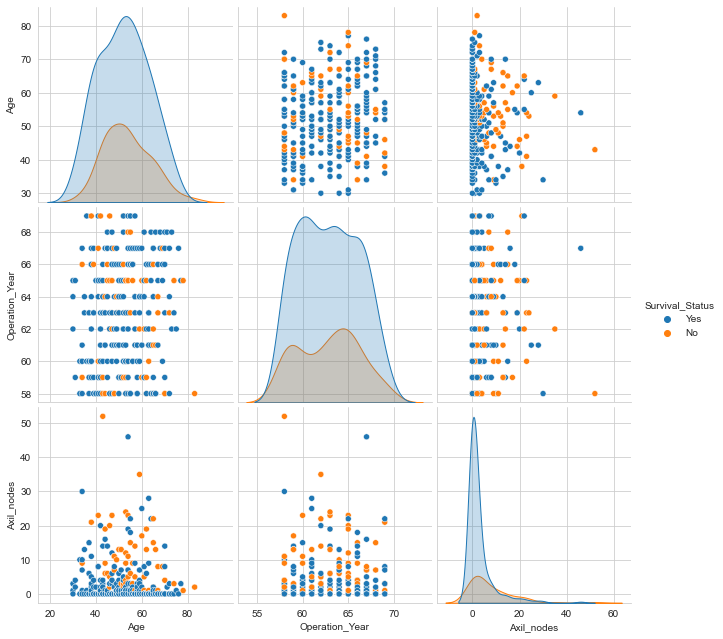

In [11]:
#Pairwise scatter plot: Pair-Plot

#Dis-advantages: 
##Can be used when number of features are high.
##Cannot visualize higher dimensional patterns in 3-D and 4-D. 
#Only possible to view 2D patterns.
plt.close();
sns.set_style("whitegrid");
sns.pairplot(haberman, hue="Survival_Status", size=3);
plt.show()
#NOTE: the diagnol elements are PDFs for each feature. PDFs are expalined below.

It can be seen that the classes of Survival_Status are not lineraly separable if only two features are considered and pair plot does not give any idea of decision boundary.
Lot of overlap is found between the two classes.

### Univariate Analysis

#### Plotting PDFs to get more information


PDF for Age Column :--


C:\Users\ankun\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


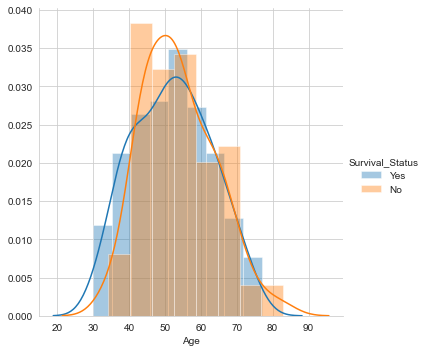

In [17]:
print("PDF for Age Column :--")
sns.FacetGrid(haberman,hue="Survival_Status",size=5)\
    .map(sns.distplot,"Age")\
        .add_legend()

Age feature shows lot of overlap between the two classes.

It can be seen that people with age 45-60 have undergone the cancer surgery the most.

PDF is almost normally distributed

PDF for Operation_Year Column :--


C:\Users\ankun\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


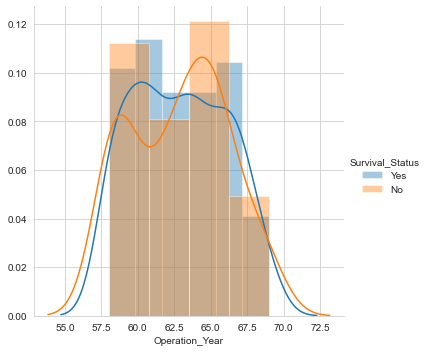

In [18]:
print("PDF for Operation_Year Column :--")

sns.FacetGrid(haberman,hue="Survival_Status",size=5)\
    .map(sns.distplot,"Operation_Year")\
        .add_legend() 

Operation_Year feature shows lot of overlap between the two classes.

The blue peak shows that the highest number of surgeries of people who survived were performed between 1958-1962.

The orange peak shows that the highest number of surgeries of people who did not survive were performed between 1963-1967.

PDF for Axil_nodes Column :--


C:\Users\ankun\anaconda3\lib\site-packages\seaborn\axisgrid.py:316: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\ankun\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


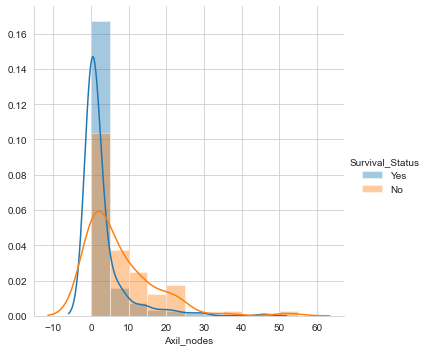

In [19]:
print("PDF for Axil_nodes Column :--")
binn=[i*5 for i in range(0,12)]
sns.FacetGrid(haberman,hue="Survival_Status", size=5)\
    .map(sns.distplot,"Axil_nodes",bins=binn)\
        .add_legend()

Axil_nodes feature shows lot of overlap between the two classes.

It can be seen that most people who have survived/not survived after the surgery had 0-5 positive axil nodes

Both the distributions are skewed

### Plotting CDF

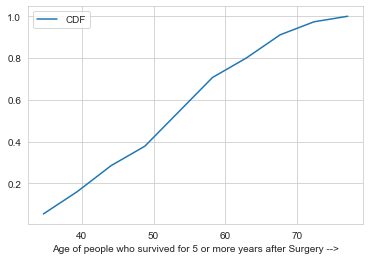

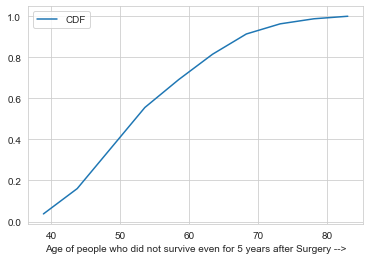

In [20]:
# getting data of the histogram
count, bins_count = np.histogram((haberman[haberman.Survival_Status=="Yes"]).Age, bins=10,density=True)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Age of people who survived for 5 or more years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()


count, bins_count = np.histogram((haberman[haberman.Survival_Status=="No"]).Age, bins=10,density=True)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting CDF
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Age of people who did not survive even for 5 years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()

80% of the people who had survived had age < 65 years

80% of the people who had not survived had age < 65 years

Operation year range :-
People who survived: 1958 - 1969
People who did not survive: 1958 - 1969


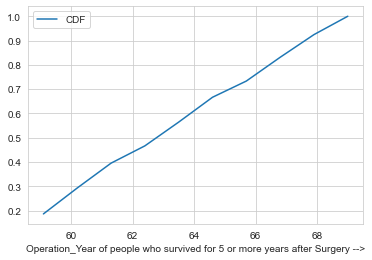

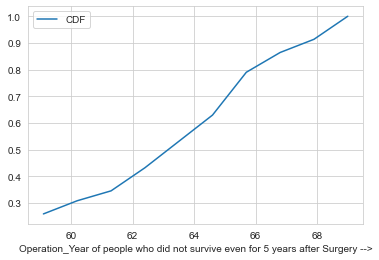

In [22]:
print("Operation year range :-")
seriesYes=(haberman[haberman.Survival_Status=="Yes"]).Operation_Year
seriesNo=(haberman[haberman.Survival_Status=="No"]).Operation_Year
print(f"People who survived: 19{seriesYes.min()} - 19{seriesYes.max()}")
print(f"People who did not survive: 19{seriesNo.min()} - 19{seriesNo.max()}")
# getting data of the histogram
count, bins_count = np.histogram((haberman[haberman.Survival_Status=="Yes"]).Operation_Year, bins=10,density=True)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Operation_Year of people who survived for 5 or more years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()


count, bins_count = np.histogram((haberman[haberman.Survival_Status=="No"]).Operation_Year, bins=10,density=True)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Operation_Year of people who did not survive even for 5 years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()

Around 75% of the operations were done between 1958-1966 for the people who survived

Around 82% of the operations were done between 1958-1966 for the people who did not survive

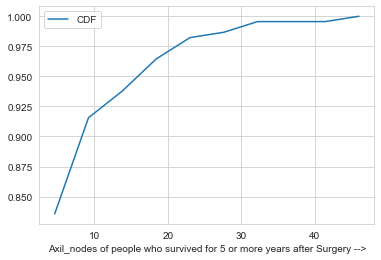

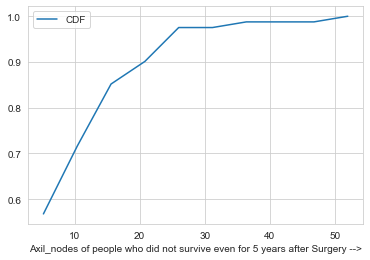

In [24]:
# getting data of the histogram
count, bins_count = np.histogram((haberman[haberman.Survival_Status=="Yes"]).Axil_nodes, bins=10,density=True)
  
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Axil_nodes of people who survived for 5 or more years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()


count, bins_count = np.histogram((haberman[haberman.Survival_Status=="No"]).Axil_nodes, bins=10,density=True)
# finding the PDF of the histogram using count values
pdf = count / sum(count)
  
# using numpy np.cumsum to calculate the CDF
# We can also find using the PDF values by looping and adding
cdf = np.cumsum(pdf)
  
# plotting PDF and CDF
# plt.plot(bins_count[1:], pdf, color="red", label="PDF")
plt.plot(bins_count[1:], cdf, label="CDF")
plt.xlabel("Axil_nodes of people who did not survive even for 5 years after Surgery -->",fontdict={'fontsize':10})
plt.legend()
plt.show()

As stated earlier, the first plot clearly shows that 85% of the people who had survived even after 5 years of surgery had <=5 positive axial nodes.

The second curve shows that 60% of the people who did not survive had around 0-5 positive axial nodes.

## Outlier Analysis

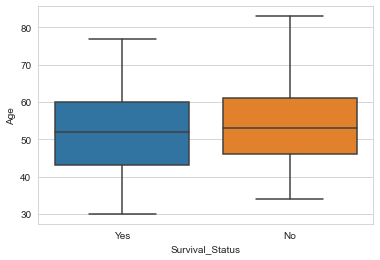

In [27]:
sns.boxplot(x="Survival_Status",y="Age",data=haberman)
plt.show()

No Outliers in Age column

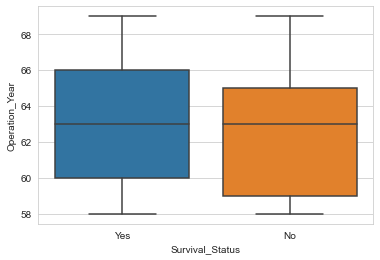

In [29]:
sns.boxplot(x="Survival_Status",y="Operation_Year",data=haberman)
plt.show()

No Outliers in Operation_Year column

The patients treated after 1965 have the slighlty higher chance to surive that the rest. The patients treated before 1960 have slighlty lower chance to surive that the rest.

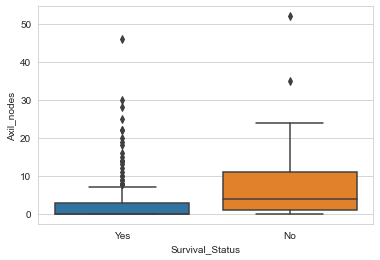

In [31]:
sns.boxplot(x="Survival_Status",y="Axil_nodes",data=haberman)
plt.show()

Outliers are there in Axil_nodes column

Patients having more than 8 positive axial nodes have less probability of survival.

In [32]:
def detect_outlier_IQR(data):
    Q1=data.quantile(0.25)
    Q3=data.quantile(0.75)
    IQR=Q3-Q1
    data_final=data[~((data<(Q1-1.5*IQR)) | (data>(Q3+1.5*IQR)))]
    return len(data_final)

In [34]:
beforeRemovingOutliersYes=(haberman[haberman.Survival_Status=="Yes"].Axil_nodes).count()
afterRemovingOutliersYes=detect_outlier_IQR(haberman[haberman.Survival_Status=="Yes"].Axil_nodes)
print("No. of outliers in Axial Nodes column for people who survived for 5 or more years after surgery =",beforeRemovingOutliersYes-afterRemovingOutliersYes)

No. of outliers in Axial Nodes column for people who survived for 5 or more years after surgery = 26


In [ ]:
beforeRemovingOutliersNo=(haberman[haberman.Survival_Status=="No"].Axil_nodes).count()
afterRemovingOutliersNo=detect_outlier_IQR(df_haberman[df_haberman.Survival_Status_After_5_Years=="No"].Axil_nodes)
print("No. of outliers in Axial Nodes column for people who died within 5 years after surgery =",beforeRemovingOutliersNo-afterRemovingOutliersNo)